# <span style="color:green"> Compilazione ed esecuzione dei programmi </span>
Per la compilazione e l'esecuzione del programma bastano i comandi make e mpiexec -np "numero di processi paralleli desiderati" parallel_genetic_salesman

In [18]:
#importazione pacchetti necessari
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Esercizi 10.1 e 10.2

Ho deciso di parallelizzare il mio algoritmo genetico, con la tecnica dei continenti e delle migrazioni, e lo ho implementato al problema delle capitali degli stati americani. Ho inizializzato i simulatori di numeri casuali con semi diversi in modo da non simuare continenti identici.

Mostro soto il confronto tra i risultati ottenti con sei processi in parallelo con migrazioni ogni cinque generazioni, e lo stesso algoritmo eseguito su sei processi ma senza eseguire migrazioni(ho fatto questo portando il numero di generazioni per una migrazione ad essere maggiori del numero di generazioni dell'algoritmo), si noti che in questo secondo caso viene graficato il miglior percorso tra tutti i processi paralleli.

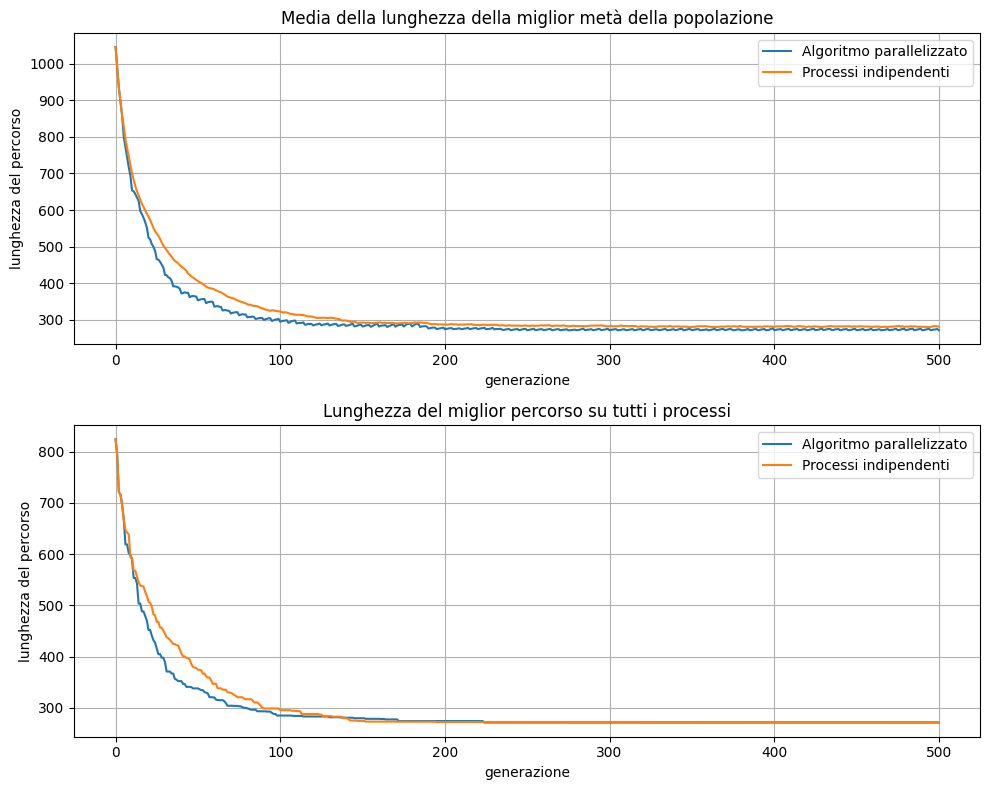

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

mean = np.loadtxt("mean_6PP.dat",usecols=1,skiprows=1,dtype=float)
numlanci = np.loadtxt("mean_6PP.dat",usecols=0,skiprows=1,dtype=int)
mean_ind = np.loadtxt("mean_ind.dat",usecols=1,skiprows=1,dtype=float)
numlanci_ind = np.loadtxt("mean_ind.dat",usecols=0,skiprows=1,dtype=int)

axes[0].plot(numlanci,mean,label='Algoritmo parallelizzato')
axes[0].plot(numlanci_ind,mean_ind,label='Processi indipendenti')
axes[0].set_xlabel('generazione')
axes[0].set_ylabel('lunghezza del percorso')
axes[0].set_title('Media della lunghezza della miglior metà della popolazione')
axes[0].legend()
axes[0].grid(True)



best_ind = np.loadtxt("best_ind.dat",usecols=1,skiprows=1,dtype=float)
numlanci_ind = np.loadtxt("best_ind.dat",usecols=0,skiprows=1,dtype=int)
best = np.loadtxt("best_6PP.dat",usecols=1,skiprows=1,dtype=float)
numlanci = np.loadtxt("best_6PP.dat",usecols=0,skiprows=1,dtype=int)

axes[1].plot(numlanci,best,label='Algoritmo parallelizzato')
axes[1].plot(numlanci_ind,best_ind,label='Processi indipendenti')
axes[1].set_xlabel('generazione')
axes[1].set_ylabel('lunghezza del percorso')
axes[1].set_title('Lunghezza del miglior percorso su tutti i processi')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


Si nota una più rapida convergenza dell'algoritmo parallelo rispetto a quello a processi indipendenti sia da un punto di vista della media che da un punto di vista del miglior percorso. Si nota però che le ricerche indipendenti trovano un minimo globale di lunghezza paragonabile rispetto alle ricerche in parallelo, inoltre si potrebbe supporre che le ricerche in parallelo hanno tutte la tendenza a convergere alla miglior disposizione disponibile, mentre le ricerche indipendenti possono esplorare liberamente parti diverse dello spazio dei possibili percorsi. Ciò farebbe pensare che ricerche totalmente indipendenti possano essere migliori per trovare il minimo assoluto della funzione costo che vogliamo minimizzare, mentre ricerche parallele migliorano la velocità di convergenza a un minimo locale della nostra ricerca.

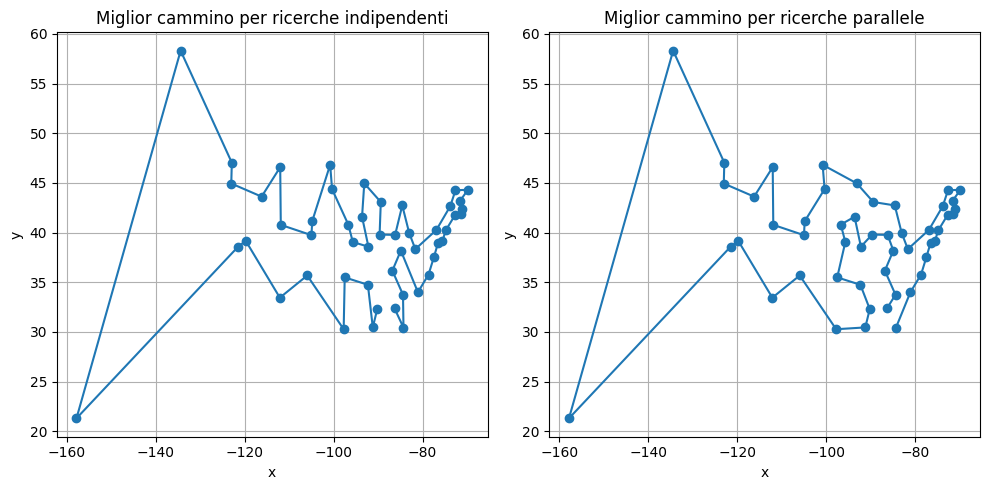

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))


x = np.loadtxt("draw_ind.dat",usecols=0,dtype=float)
y = np.loadtxt("draw_ind.dat",usecols=1,dtype=float)

axes[0].plot(x,y,'-o')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid(True)
axes[0].set_title('Miglior cammino per ricerche indipendenti')


x = np.loadtxt("draw_6PP.dat",usecols=0,dtype=float)
y = np.loadtxt("draw_6PP.dat",usecols=1,dtype=float)

axes[1].plot(x,y,'-o')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Miglior cammino per ricerche parallele')
axes[1].grid(True)


plt.tight_layout()
plt.show()

Si nota che i cammini seppur abbastanza simili hanno grosse divergenze nella regione centrale dell'america.